<h1 style="text-align:left;">CRISP-DM: Regresión</h1>

<br>
El objetivo de este notebook es conocer la metodología CRISP-DM y trabajarla en un proyecto end-to-end.<br>
En este notebook nos centraremos en un problema de <strong>regresión</strong>, así podremos entender cómo se puede afrontar un problema de este tipo y dar unos primeros pasos.
<br>
Como se aprende siempre mejor es con ejemplos y práctica, o así lo considera el autor, es por ello que en este notebook trabajaremos un caso de uso (inventado) pero con datos reales para poder empezar a entender cómo funciona esto en la vida real.
<br>
Por lo tanto podemos decir que <strong>CRISP-DM es el proceso que debemos seguir para enfrentarnos a los datos y poder trabajar con machine learning.</strong>

## 1. Business Understanding

En este apartado debemos <strong>entender el problema y conocer cual es el objetivo que buscamos en términos de negocio.</strong> Todas las fases de la metodología CRISP-DM son muy importantes, pero esta primera fase, además de la fase 2, suelen ser las más críticas porque es donde se sustenta el resto del proyecto.

En esta primera fase queremos entender qué nos piden: ver la importancia de los Four Factors en las victorias de los equipos en la Turkish Airlines Euroleague 2023/2024.

##### Definiendo el sistema.
Una vez sabemos qué nos piden, tendremos que definir el sistema que queremos llevar a cabo para desarrollar un modelo que se alinee con el objetivo de negocio.
 - Es un problema de <b>'Aprendizaje Supervisado'</b> (Supervised Learning). Dispondremos de los datos estádisticos (convencionales y avanzados) de los equipos de la Turkish Airlines Euroleague, por lo tanto como tenemos esos valores (Four Factors) en el dataset y queremos predecir el Winning Rate, este sistema será de este tipo.
 - Es un problema de <b>'Regresión'</b> (Regression). Queremos predecir un valor continuo (Winning Rate o Ratio de victorias), por lo que iremos en esta línea para desarrollar el sistema.

### 1.2. Seleccionando una medida para medir la performance
Una vez sabemos cómo es el proyecto al que nos debemos enfrentar y cómo lo hemos definido, <strong>debemos seleccionar una métrica correcta con la que podamos medir la performance de nuestro proyecto.</strong>

Queremos predecir el Winning Rate de un equipo, por lo que consideramos que usar la métrica <strong>RMSE</strong> es suficientemente interesante como para medir la performance de nuestro modelo.

## 2. Data Understanding

Ya entendemos qué queremos desarrollar y qué metrica utilizaremos para ello, <strong>ahora es momento de enfrentarnos a los datos y comprenderlos.</strong> Esta fase, como se menciona antes, es muy importante para poder trabajar con los datos correctamente.

Los datos obtenidos son estadísticas tradicionales y avanzadas de los equipos de la Euroleague 2023/2024, por lo que empezamos a analizarlos.

<br>
<br>
NOTA:

Los datos son obtenidos mediante los boxscore de la página https://www.euroleaguebasketball.net/euroleague/ y https://hackastat.eu/en/home-page-eng/.

In [94]:
# Cargamos las librerías

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sn
from IPython.display import FileLink
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [95]:
# Cargamos el dataset
dt = pd.read_csv('data/Teams_Stats_RS_input.csv', sep=';')

### 2.2. Echando un primer vistazo...

Antes de empezar con un análisis más concreto, vamos a conocer las columnas y cómo lucen los datos. Con 'head' podemos ver las 5 primeras muestras del dataset para hacernos una idea.

In [96]:
dt.head()

,RNK,TM NAME,GP,W,L,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,PACE,POSS,SHOOTING CHANCES,OFF PPP,DEF PPP,OFF RTG,DEF RTG,NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,KILLS,PSF FREQ,DSF FREQ,SoS
0,1,ALBA Berlin,34,5,29,"200,0","76,2","18,9","37,1",51%,"8,9","25,3",35%,"27,7","62,4",44%,"11,9","15,0",79%,"10,8","21,6","32,4","16,4","15,2","7,0","2,1","3,5","18,3","18,1","77,6","-10,4","73,0","73,0","84,0","0,91","1,03","104,4","118,5","-14,1",52%,55%,15%,"1,43",21%,"0,82",9%,"0,79",3%,"1,36",26%,"1,03",8%,18%,48%,44%,76%,23%,20%,"1,08","30,7%","35,3%","29,0%","15,8%","66,2%","62,5%","64,4%","79,1%","47,8%","9,5%","3,3%","4,1",48%,44%,49%
1,2,Anadolu Efes Istanbul,34,17,17,"203,7","85,9","21,5","38,1",56%,"10,0","27,0",37%,"31,5","65,1",48%,"13,0","15,9",81%,"10,0","22,1","32,1","18,1","10,4","7,0","3,1","2,0","18,6","18,4","96,9","0,1","70,7","72,0","82,1","1,05","1,04","119,4","118,7","0,7",56%,60%,15%,"1,57",24%,"0,97",8%,"0,79",5%,"1,39",28%,"1,05",8%,13%,48%,43%,77%,19%,22%,"1,74","29,4%","37,5%","24,1%","17,4%","68,0%","65,1%","67,4%","72,1%","48,3%","9,6%","4,8%","4,1",48%,47%,49%
2,3,AS Monaco,34,23,11,"200,7","81,6","21,5","40,6",53%,"8,1","22,9",35%,"29,6","63,5",47%,"14,4","19,4",74%,"11,4","23,1","34,6","16,0","10,4","6,7","1,9","2,3","19,7","21,4","91,0","2,4","70,3","70,6","82,2","0,99","0,98","115,7","112,3","3,4",53%,57%,10%,"1,51",27%,"1,00",12%,"0,78",1%,"0,91",27%,"1,07",10%,13%,43%,45%,65%,15%,20%,"1,55","32,6%","36,3%","33,4%","22,5%","69,3%","66,7%","66,6%","84,6%","50,5%","9,5%","3,1%","5,1",44%,47%,50%
3,4,Baskonia Vitoria-Gasteiz,34,18,16,"200,7","84,2","19,5","35,2",55%,"10,4","28,3",37%,"29,9","63,5",47%,"14,0","18,4",76%,"10,3","24,9","35,2","18,8","12,5","5,4","2,3","3,2","18,3","19,1","93,2","-0,6","72,9","73,1","83,6","1,01","1,02","115,2","116,3","-1,1",55%,59%,11%,"1,64",23%,"0,95",7%,"0,78",2%,"1,59",31%,"1,07",9%,15%,51%,47%,75%,26%,23%,"1,51","29,7%","35,4%","29,3%","17,2%","70,4%","69,0%","68,2%","87,8%","50,2%","7,5%","3,5%","4,9",48%,50%,51%
4,5,Crvena Zvezda Meridianbet Belgrade,34,11,23,"200,0","81,6","20,1","36,5",55%,"9,3","26,9",35%,"29,4","63,4",46%,"13,4","17,5",77%,"11,6","23,0","34,6","18,6","12,1","6,8","2,5","2,7","21,7","19,8","89,3","-1,0","71,3","71,3","83,1","0,98","1,01","114,4","116,1","-1,7",54%,57%,12%,"1,56",27%,"1,00",5%,"0,62",4%,"1,24",28%,"1,02",9%,15%,51%,52%,66%,27%,22%,"1,54","33,2%","40,1%","31,8%","20,0%","68,5%","63,8%","69,8%","75,4%","50,5%","9,5%","4,0%","4,0",45%,47%,49%


Podemos comprobar que tenemos una tabla con <strong>74 columnas</strong>, donde tenemos una de ellas llamada 'W' que son las victorias (variable que queremos predecir, aunque no de ese modo).
<br>
<br>
Vamos a echar un vistazo a los diferentes tipos de datos que tenemos en el dataset.

In [97]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RNK               18 non-null     int64 
 1   TM NAME           18 non-null     object
 2   GP                18 non-null     int64 
 3   W                 18 non-null     int64 
 4   L                 18 non-null     int64 
 5   MIN               18 non-null     object
 6   PTS               18 non-null     object
 7   2PTM              18 non-null     object
 8   2PTA              18 non-null     object
 9   2PT%              18 non-null     object
 10  3PTM              18 non-null     object
 11  3PTA              18 non-null     object
 12  3PT%              18 non-null     object
 13  FGM               18 non-null     object
 14  FGA               18 non-null     object
 15  FG%               18 non-null     object
 16  FTM               18 non-null     object
 17  FTA               

A continuación, limpiamos y modelamos el dataset para poder utilizarlo en nuestro modelo de regresión.

In [98]:
# Reemplazar "DNP" y "-" por 0
dt = dt.replace({'DNP': 0, '-': 0})

# Función para eliminar el % y convertir a decimal
def convert_percentage(column):
     # Reemplaza comas por puntos
    column = column.str.replace(',', '.')
    # Elimina el símbolo % y convierte a decimal
    return pd.to_numeric(column.str.replace('%', ''), errors='coerce') / 100
# Aplica la conversión a las columnas que contienen porcentajes
for column in dt.columns:
    if dt[column].dtype == object and dt[column].str.contains('%').any():
        dt[column] = convert_percentage(dt[column])

# Reemplaza las comas por puntos y convierte las columnas a tipo float
for column in dt.columns:
    # Verifica si la columna contiene números con comas
    if dt[column].dtype == object and dt[column].str.contains(',').any():
        # Reemplaza comas por puntos
        dt[column] = dt[column].str.replace(',', '.')
        # Convierte la columna al tipo numérico (float)
        dt[column] = dt[column].astype(float)

dt.info()
# Descargar en formato de comas para el caso de uso
from IPython.display import FileLink
# Guardar el DataFrame modificado en un nuevo archivo CSV
output_path = 'output_teams_stats_jupyter.csv'
dt.to_csv(output_path, index=False)
# Crear un enlace de descarga para el archivo
display(FileLink(output_path)) 
        
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RNK               18 non-null     int64  
 1   TM NAME           18 non-null     object 
 2   GP                18 non-null     int64  
 3   W                 18 non-null     int64  
 4   L                 18 non-null     int64  
 5   MIN               18 non-null     float64
 6   PTS               18 non-null     float64
 7   2PTM              18 non-null     float64
 8   2PTA              18 non-null     float64
 9   2PT%              18 non-null     float64
 10  3PTM              18 non-null     float64
 11  3PTA              18 non-null     float64
 12  3PT%              18 non-null     float64
 13  FGM               18 non-null     float64
 14  FGA               18 non-null     float64
 15  FG%               18 non-null     float64
 16  FTM               18 non-null     float64
 17 

C:\Users\mendi\output_teams_stats_jupyter.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RNK               18 non-null     int64  
 1   TM NAME           18 non-null     object 
 2   GP                18 non-null     int64  
 3   W                 18 non-null     int64  
 4   L                 18 non-null     int64  
 5   MIN               18 non-null     float64
 6   PTS               18 non-null     float64
 7   2PTM              18 non-null     float64
 8   2PTA              18 non-null     float64
 9   2PT%              18 non-null     float64
 10  3PTM              18 non-null     float64
 11  3PTA              18 non-null     float64
 12  3PT%              18 non-null     float64
 13  FGM               18 non-null     float64
 14  FGA               18 non-null     float64
 15  FG%               18 non-null     float64
 16  FTM               18 non-null     float64
 17 

Solo hemos descargado el formato csv utilizado en el caso de uso, puesto que el dataset utilizado como input es el utilizado en la plataforma PowerBI.

In [99]:
dt.head()

,RNK,TM NAME,GP,W,L,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,PACE,POSS,SHOOTING CHANCES,OFF PPP,DEF PPP,OFF RTG,DEF RTG,NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,KILLS,PSF FREQ,DSF FREQ,SoS
0,1,ALBA Berlin,34,5,29,200.0,76.2,18.9,37.1,0.51,8.9,25.3,0.35,27.7,62.4,0.44,11.9,15.0,0.79,10.8,21.6,32.4,16.4,15.2,7.0,2.1,3.5,18.3,18.1,77.6,-10.4,73.0,73.0,84.0,0.91,1.03,104.4,118.5,-14.1,0.52,0.55,0.15,1.43,0.21,0.82,0.09,0.79,0.03,1.36,0.26,1.03,0.08,0.18,0.48,0.44,0.76,0.23,0.20,1.08,0.307,0.353,0.290,0.158,0.662,0.625,0.644,0.791,0.478,0.095,0.033,4.1,0.48,0.44,0.49
1,2,Anadolu Efes Istanbul,34,17,17,203.7,85.9,21.5,38.1,0.56,10.0,27.0,0.37,31.5,65.1,0.48,13.0,15.9,0.81,10.0,22.1,32.1,18.1,10.4,7.0,3.1,2.0,18.6,18.4,96.9,0.1,70.7,72.0,82.1,1.05,1.04,119.4,118.7,0.7,0.56,0.60,0.15,1.57,0.24,0.97,0.08,0.79,0.05,1.39,0.28,1.05,0.08,0.13,0.48,0.43,0.77,0.19,0.22,1.74,0.294,0.375,0.241,0.174,0.680,0.651,0.674,0.721,0.483,0.096,0.048,4.1,0.48,0.47,0.49
2,3,AS Monaco,34,23,11,200.7,81.6,21.5,40.6,0.53,8.1,22.9,0.35,29.6,63.5,0.47,14.4,19.4,0.74,11.4,23.1,34.6,16.0,10.4,6.7,1.9,2.3,19.7,21.4,91.0,2.4,70.3,70.6,82.2,0.99,0.98,115.7,112.3,3.4,0.53,0.57,0.10,1.51,0.27,1.00,0.12,0.78,0.01,0.91,0.27,1.07,0.10,0.13,0.43,0.45,0.65,0.15,0.20,1.55,0.326,0.363,0.334,0.225,0.693,0.667,0.666,0.846,0.505,0.095,0.031,5.1,0.44,0.47,0.50
3,4,Baskonia Vitoria-Gasteiz,34,18,16,200.7,84.2,19.5,35.2,0.55,10.4,28.3,0.37,29.9,63.5,0.47,14.0,18.4,0.76,10.3,24.9,35.2,18.8,12.5,5.4,2.3,3.2,18.3,19.1,93.2,-0.6,72.9,73.1,83.6,1.01,1.02,115.2,116.3,-1.1,0.55,0.59,0.11,1.64,0.23,0.95,0.07,0.78,0.02,1.59,0.31,1.07,0.09,0.15,0.51,0.47,0.75,0.26,0.23,1.51,0.297,0.354,0.293,0.172,0.704,0.690,0.682,0.878,0.502,0.075,0.035,4.9,0.48,0.50,0.51
4,5,Crvena Zvezda Meridianbet Belgrade,34,11,23,200.0,81.6,20.1,36.5,0.55,9.3,26.9,0.35,29.4,63.4,0.46,13.4,17.5,0.77,11.6,23.0,34.6,18.6,12.1,6.8,2.5,2.7,21.7,19.8,89.3,-1.0,71.3,71.3,83.1,0.98,1.01,114.4,116.1,-1.7,0.54,0.57,0.12,1.56,0.27,1.00,0.05,0.62,0.04,1.24,0.28,1.02,0.09,0.15,0.51,0.52,0.66,0.27,0.22,1.54,0.332,0.401,0.318,0.200,0.685,0.638,0.698,0.754,0.505,0.095,0.040,4.0,0.45,0.47,0.49


Interesante, después de la limpieza <strong>no tenemos ningún valor nulo</strong> por lo que podemos empezar a modelar nuestro dataset. Recordemos que <strong>cuando encontramos valores nulos en un dataset debemos trabajar con ellos antes de introducirlos a un modelo</strong>, por ello es tan importante este paso en el que debemos analizar los datos que tenemos.

Además vemos que:
 - Tenemos una <strong>variable tipo object</strong>, TM NAME o el nombre del equipo en cuestión.
 - Tenemos unas 73 <strong>variables numéricas</strong> de las cuales solo utilizaremos los "Four Factors".
<br>
<br>
Vamos a echar un vistazo a los <strong>parámetros estadísticos</strong> de nuestros datos, así podemos ver percentiles e información que creamos relevante.

In [100]:
dt.describe()

,RNK,GP,W,L,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,PACE,POSS,SHOOTING CHANCES,OFF PPP,DEF PPP,OFF RTG,DEF RTG,NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,KILLS,PSF FREQ,DSF FREQ,SoS
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.500000,34.0,17.000000,17.000000,201.544444,81.544444,20.322222,37.188889,0.546111,9.166667,25.188889,0.362778,29.477778,62.377778,0.472222,13.450000,17.288889,0.777778,10.338889,23.411111,33.766667,17.588889,12.40000,6.550000,2.411111,2.405556,19.788889,19.522222,90.116667,-0.005556,71.072222,71.611111,82.088889,0.994444,0.993333,113.888889,113.883333,0.038889,0.546667,0.58500,0.133889,1.548889,0.233889,0.941111,0.086667,0.786667,0.035000,1.292222,0.267222,1.071111,0.089444,0.152222,0.482778,0.450556,0.743333,0.233889,0.215000,1.432778,0.306056,0.345722,0.310944,0.183556,0.693389,0.652889,0.690278,0.819556,0.499722,0.091500,0.038500,4.561111,0.461111,0.470000,0.498889
std,5.338539,0.0,5.551894,5.551894,1.407636,3.660476,1.416522,2.600201,0.019445,1.056632,2.194884,0.015645,1.245489,1.969639,0.014371,1.367372,1.772300,0.028192,1.029642,1.298365,1.709833,1.560878,1.09168,0.533854,0.510926,0.602419,1.297912,0.891499,7.291595,4.290821,1.588860,1.521179,2.231035,0.038382,0.031060,4.275496,3.472624,5.816825,0.017150,0.01855,0.022528,0.073476,0.028930,0.060962,0.019704,0.081529,0.012485,0.164694,0.028657,0.055613,0.008726,0.012628,0.035448,0.047462,0.050527,0.038827,0.016891,0.194507,0.020655,0.031353,0.035639,0.048724,0.016550,0.023281,0.027877,0.044171,0.011886,0.007695,0.007326,0.424457,0.029082,0.034641,0.011318
min,1.000000,34.0,5.000000,7.000000,200.000000,75.900000,18.200000,33.200000,0.510000,7.200000,21.300000,0.330000,27.400000,59.100000,0.440000,10.800000,13.600000,0.730000,9.000000,21.600000,31.000000,15.400000,10.40000,5.400000,1.600000,1.600000,17.900000,18.100000,77.600000,-10.400000,67.500000,68.300000,77.800000,0.910000,0.940000,104.400000,108.100000,-14.100000,0.510000,0.55000,0.100000,1.420000,0.180000,0.820000,0.050000,0.610000,0.010000,0.910000,0.210000,0.960000,0.070000,0.130000,0.410000,0.350000,0.650000,0.150000,0.190000,1.080000,0.275000,0.301000,0.241000,0.103000,0.662000,0.603000,0.644000,0.721000,0.478000,0.075000,0.025000,3.900000,0.410000,0.400000,0.490000
25%,5.250000,34.0,14.000000,12.500000,200.700000,78.700000,19.175000,35.400000,0.530000,8.550000,23.600000,0.352500,28.550000,60.550000,0.470000,12.575000,16.075000,0.760000,9.650000,22.900000,32.300000,16.125000,12.02500,6.075000,2.100000,1.925000,18.625000,19.025000,85.825000,-2.125000,70.075000,70.800000,81.100000,0.982500,0.972500,111.825000,110.975000,-3.125000,0.540000,0.57000,0.112500,1.510000,0.212500,0.905000,0.072500,0.747500,0.030000,1.210000,0.250000,1.055000,0.082500,0.150000,0.460000,0.420000,0.715000,0.212500,0.200000,1.247500,0.296250,0.310750,0.284000,0.148250,0.682750,0.637250,0.675750,0.794750,0.493000,0.084250,0.033500,4.150000,0.442500,0.450000,0.490000
50%,9.500000,34.0,17.000000,17.000000,201.100000,81.600000,20.150000,36.700000,0.550

A continuación, crearemos la variable a predecir Win Rate (W%) y eliminaremos todas las variables del dataset exceptuando los Four Factors, la variable creada a continuación (W%) y TM NAME.

In [101]:
# Crear la nueva columna W% y calcular su valor
dt['W%'] = dt['W'] / (dt['W'] + dt['L'])

# Nos quedamos solo con los 4 factors
columns_to_keep = ['TM NAME', 'W%', 'OR%', "TO%", 'eFG%', 'FT Ratio']
dt = dt[columns_to_keep]

In [102]:
dt.head()

,TM NAME,W%,OR%,TO%,eFG%,FT Ratio
0,ALBA Berlin,0.147059,0.307,0.18,0.52,0.08
1,Anadolu Efes Istanbul,0.500000,0.294,0.13,0.56,0.08
2,AS Monaco,0.676471,0.326,0.13,0.53,0.10
3,Baskonia Vitoria-Gasteiz,0.529412,0.297,0.15,0.55,0.09
4,Crvena Zvezda Meridianbet Belgrade,0.323529,0.332,0.15,0.54,0.09


Echamos un vistazo a los <strong>histogramas</strong>, para comprender un poco mejor las variables numéricas que disponemos en el nuevo dataset.

array([[<Axes: title={'center': 'W%'}>, <Axes: title={'center': 'OR%'}>,
        <Axes: title={'center': 'TO%'}>,
        <Axes: title={'center': 'eFG%'}>,
        <Axes: title={'center': 'FT Ratio'}>]], dtype=object)

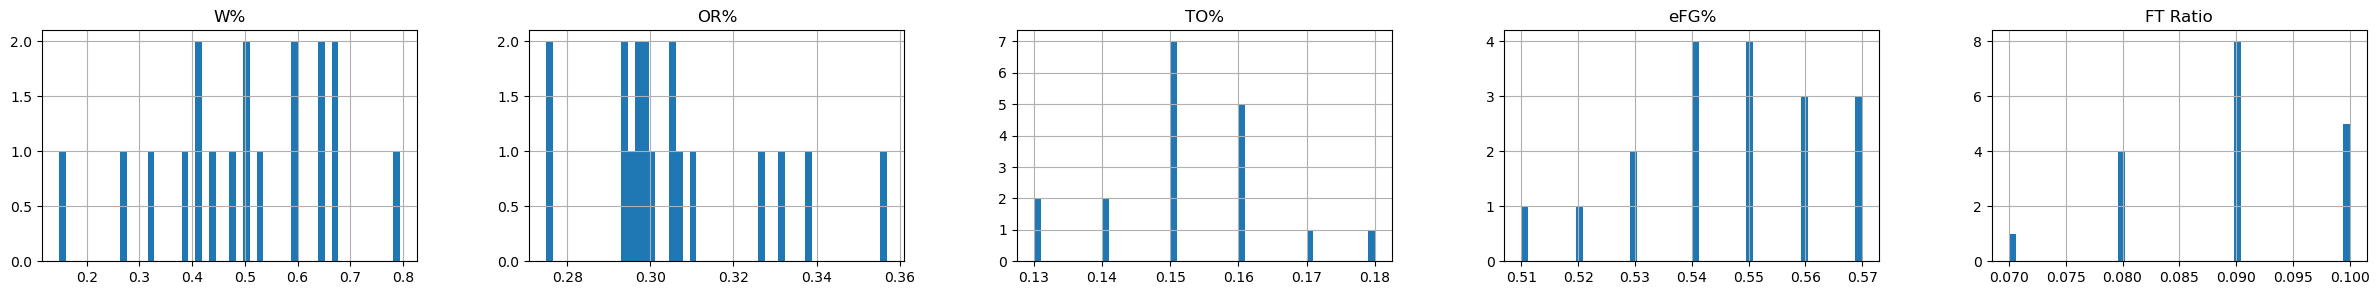

In [103]:
dt.hist(bins=50, figsize=(30, 3), layout=(1, 5))

Vemos que no hay escalas muy diferentes... podemos ver en el histograma de 'W%' que la variable oscila generalmente entre el 0,4 y 0,7.
<br>
También comprobamos en el histograma de OR% que la mayoria de los equipos no superan el 31% de rebotes ofensivos por partido.

A continuación, veremos la correlación de las variables numéricas (Four Factors) para explicar el "W%".

### 2.3. EDA: Exploratory Data Analysis

##### Es una forma de analizar, visualizar y entender la información que están ocultos bajo filas y columnas.

Cuando nos enfrentamos a un dataset, debemos hacer un estudio y análisis de los datos que hay en dicho dataset para poder comprenderlos y sacar conocimiento de ellos.

Parece que es algo trivial, pero el foco y el trabajo que se haga en este apartado es fundamental para poder desarrollar un modelo de Inteligencia Artificial.

##### Es importante entender que el estudio de los datos y la extracción de conocimiento es parte fundamental de un Data Scientist, y por ello antes de enfrentarnos a los modelos de inteligencia artificial debemos comprender y tratar los datos que tenemos.



In [104]:
corr_matrix = dt.select_dtypes(include=[np.number]).corr()
corr_matrix['W%'].sort_values(ascending=False)

W%          1.000000
FT Ratio    0.594961
eFG%        0.580734
OR%         0.139010
TO%        -0.654418
Name: W%, dtype: float64

###### Correlaciones
Conocer las correlaciones en nuestros datos nos ofrece una información muy clara e importante para avanzar. Si podemos lograr u obtener algún tipo de variable que se relacione bien con lo que queremos predecir, tenemos una buena noticia. Por ello es importante hacer este análisis. <strong>En ocasiones podemos descubrir que una variable afecta mucho a la label que queremos predecir, en otras ocasiones la combinación de diferentes lo consigue, quizás descubrimos que un tipo de variable afecta más que otras y por lo tanto deberíamos investigar nuevas fuentes de dato relacionadadas con ese tipo de datos... </strong>multitud de información que podemos obtener.

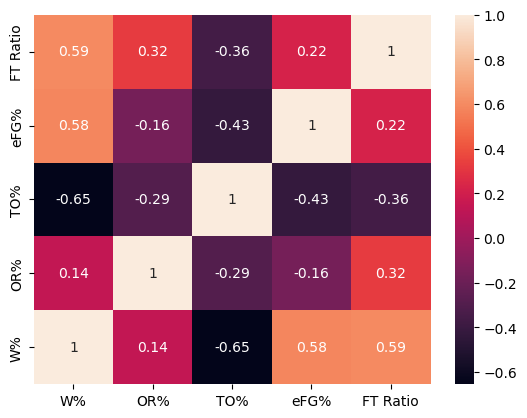

In [105]:
# Mostrar las correlaciones mediante un heatmap 
heatmap = sn.heatmap(corr_matrix, annot=True)
heatmap.set(ylim=(0,len(corr_matrix)))
heatmap.set(xlim=(0,len(corr_matrix)))

plt.show()

Esta matriz nos ofrece la correlación lineal entre variables, en este caso cada variable frente a W%. Podemos ver que hay valores negativos y positivos, ¿qué significa esto? <strong>Significa que la correlación oscila entre 1 y -1: si es 1 significa que hay una correlación absoluta y en la misma dirección (si una variable sube la otra también sube), si es -1 significa que hay una correlación absoluta pero en diferente dirección (si una variable sube, la otra baja).</strong> Esto último no significa que sea malo, de hecho indica una correlación muy buena, porque sabemos que cuando algo sube otra cosa baja, y eso nos da mucha información. Por lo tanto, lo negativo aquí son valores cercanos al 0, lo que indica que no encuentra una relación lineal consistente.
<br>
<br>
Podemos ver una correlación de -0.65 entre W% y TO%, lo cual es muy interesante porque es alta (pensemos que un valor 1 o -1 sería una variable consigo misma, lo cual es muy complicado de lograr). Este valor nos dice que nuestra lógica tiene cierto sentido: <strong>si estamos analizando las victorias, los equipos que mas balones pierden menos partidos van a ganar.</strong> 
<br>
###### Heatmap
Otra forma de ver las correlaciones es con un heatmap, sabemos muy bien que con un gráfico siempre todo se entiende mejor, y las correlaciones se pueden ver muy fácilmente. Además aquí podemos ver todas con todas, lo cual es muy útil.

Gracias a este heatmap de correlación, vemos como la variable que mas relación tiene con "W%" es "TO%, con un -0.65. Es decir, hay una relación ciertamente lineal y negativa: cuando uno sube, el otro baja. No hay una pendiente clara, pero si cierta relación. Tiene sentido, puesto que, cuanto más cantidad de balones pierdes más probabilidades tienes de perder los partidos.

<Axes: xlabel='TO%', ylabel='W%'>

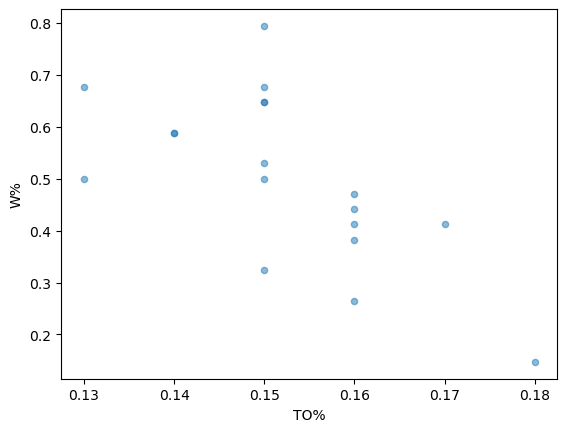

In [106]:
dt.plot(kind="scatter", x="TO%", y="W%", alpha=0.5)

### 2.4. Creando el test set

Esto es una parte clave del proceso. Vamos a separar nuestro set en dos partes, una para entrenar al modelo y otra para testarlo cuando acabemos de entrenarlo. ¿Qué significa esto? Que no queremos jugar a ver el futuro.

Una vez tenemos ciertas ideas de como son los datos debemos hacer esta separación <strong>para que las operaciones y transformaciones, así como el entrenamiento, que hagamos ahora no dependan en ningún caso de lo que habría en el set con el que comprobaremos si funciona todo o no.

Por lo tanto, importante: separamos el dataset en dos subsets, y el de test será solo utilizado al final para evaluar si nuestro proceso ha sido adecuado.

In [107]:
# Fijamos el set de test en un 20% del original, y para entrenar el 80%.
size = 0.2
train_set, test_set = train_test_split(dt, test_size=size, random_state=42)

In [108]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 3 to 6
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TM NAME   14 non-null     object 
 1   W%        14 non-null     float64
 2   OR%       14 non-null     float64
 3   TO%       14 non-null     float64
 4   eFG%      14 non-null     float64
 5   FT Ratio  14 non-null     float64
dtypes: float64(5), object(1)
memory usage: 784.0+ bytes


In [109]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TM NAME   4 non-null      object 
 1   W%        4 non-null      float64
 2   OR%       4 non-null      float64
 3   TO%       4 non-null      float64
 4   eFG%      4 non-null      float64
 5   FT Ratio  4 non-null      float64
dtypes: float64(5), object(1)
memory usage: 224.0+ bytes


##### Conclusiones

 - Tenemos una serie de variables que eliminar, puesto que queremos ver que valor de los Four Factors es la que mejor explica el W%.
 - La variable TO% es muy relevante para predecir W%.

## 3. Data Preparation

El análisis de datos hecho en el paso anterior sirve mucho para este paso. Lo que hemos analizado es la naturaleza de nuestros datos para ahora poder crear un dataset con las features interesantes y así ejecutarlo en algoritmos de ML.

###### Data cleaning
Hay variables que eliminar, es posible que con la poca cantidad de datos que tenemos la columna 'TM NAME' no la necesitemos, así que la quitaremos en esta fase.

###### Feature Scaling
Para trabajar con los modelos de ML <strong>siempre es positivo escalar las variables para que el algoritmo pueda funcionar mejor.</strong> Por ello lo aplicaremos a las columnas.


##### Preparación de los datos

Lo queremos hacer como una función porque más adelante, cuando tengamos que testar nuestro modelo con el set de test, tendremos que pasarle estas transformaciones a dicho set. Lo normal es hacer un <strong>pipeline</strong>, pero para este ejemplo nos basaremos en una función sencilla y rápida. Más adelante se comentará como se hace un pipeline.

###### Visualizando
Como acabamos de comentar, las visualizaciones son muy relevantes a la hora de sacar conclusiones de nuestros datos. Trabajar con las librerías seaborn, matplotlib... nos puede ofrecer una visión mucho más clara que nos ayude a tomar decisiones así como a ofrecer 'business value' una vez se termine el proyecto.

In [110]:
def PreparingData(dt):
    
    # Data cleaning
    dt = dt.drop(['TM NAME'], axis=1)
    
    # Standarization
    dt[['OR%', "TO%", 'eFG%', 'FT Ratio']] = StandardScaler().fit_transform(dt[['OR%', "TO%", 'eFG%', 'FT Ratio']])
    
    return dt

In [111]:
train_set_prep = PreparingData(train_set)

In [112]:
train_set_prep.head()

,W%,OR%,TO%,eFG%,FT Ratio
3,0.529412,-0.579498,-0.228086,0.269408,-0.171499
13,0.470588,-0.483487,0.836315,1.526645,1.028992
16,0.500000,-1.635625,-0.228086,-0.359211,-0.171499
15,0.411765,-0.627504,1.900715,-2.245066,-0.171499
11,0.647059,-0.723516,-0.228086,0.898027,-0.171499


Podemos ver cómo hay suficientes variables para predecir el W%.

In [113]:
corr_matrix = train_set_prep.corr()
corr_matrix['W%'].sort_values(ascending=False)

W%          1.000000
FT Ratio    0.566571
eFG%        0.503336
OR%         0.130274
TO%        -0.591434
Name: W%, dtype: float64

En esta fase hemos transformado los datos siguiendo las conclusiones que hemos extraido en la fase 2. <strong>Pero vamos a hacer una última transformación</strong>: con la poca cantidad de datos que hay en el dataset, va a ser más conveniente trabajar con la variable TO% para predecir W%. Elegimos TO% porque parece ciertamente la mejor correlada, y añadir complejidad en este nivel puede dificultar la obtención de nuestro objetivo.

Es por ello que en este notebook se va a trabajar con dos columnas: W% y TO%. Pero importante saber que para casos de uso reales, hay que ir más allá y trabajar con todas las variables coherentemente, profundizando hasta donde sea necesario. No es más que incluyendo, y transformando en el caso que sea necesario como hemos mencionado antes, todas las features en los siguientes pasos.

In [114]:
def PreparingData_v2(dt):
    dt = PreparingData(dt)
    dt = dt[['W%', 'TO%']]
    
    return dt

In [115]:
train_set = PreparingData_v2(train_set)

Vamos a crear una función que nos separe el dataset procesado en features y labels.

In [116]:
def splitDT(dt, label):
    labels = dt[[label]]
    features = dt.drop([label], axis=1)

    return features, labels

## 4. Modeling

Una vez hemos analizado todos los datos y hemos construido nuestros datasets, <strong>nos disponemos a empezar lo que es puramente machine learning.</strong>

Esta es la parte del entrenamiento, <strong>por lo que cogeremos ese set de entrenamiento</strong>, el cual ya hemos procesado, y se lo pasaremos a diferentes modelos.
Importante, como hemos aprendido es muy importante que esta parte de entrenamiento se haga mediante el llamado <strong>'Cross Validation'</strong>, así podremos saber si hay overfitting y obtener una mejor metrica de performance de nuestro modelo.

<strong>En esta fase queremos probar dos modelos, para entenderlos y sacar conclusiones. Una vez los hayamos probado, elegiremos uno de ellos (el mejor) y los mejoraremos, para así tener nuestro modelo completamente entrenado.</strong>

En esta fase vamos a analizar:
 - Linear Regression
 - Polynomial Regression

In [117]:
X_train, y_train = splitDT(train_set, 'W%')

Funciones para mostrar los scores sin CV y con CV.
<br>
Como mostraremos los scores por cada modelo que entrenamos, lo hacemos función para no repetir código continuamente, pero se puede hacer también en cada modelo.

In [118]:
def Display_Score(labels, predictions):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    print("No Cross Validation")
    print("RMSE Score: ", rmse)
    print("----------")

In [119]:
def Display_CV_Scores(scores):
    rmse_scores = np.sqrt(-scores)
    print("Cross Validation")
    print("RMSE Scores:", rmse_scores)
    print("RMSE Mean:", rmse_scores.mean())
    print("RMSE Standard deviation:", rmse_scores.std())

Función para visualizar los resultados

In [120]:
def VisualizeRegression(X, y, pred):
    
    X = X.loc[:, [X.columns[0]]]
    y = y.loc[:, [y.columns[0]]]

    inds = X.values.ravel().argsort()
    X = X.values.ravel()[inds].reshape(-1,1)
    y = y.values[inds]
    pred = pred[inds]
    
    fig, ax =  plt.subplots(figsize=(8, 6))
    ax.scatter(X, y,  color='blue', marker='.',)
    ax.plot(X, pred, color='red', label="Predictions")
    ax.set_title("W% vs TO%")
    ax.set_xlabel("TO% (after StandardScaler)")
    ax.set_ylabel("w%")
    plt.show()

### 4.1. Seleccionando y entrenando modelos

#### Linear Regression

No Cross Validation
RMSE Score:  0.11998871784035825
----------
Cross Validation
RMSE Scores: [0.01890523 0.06478135 0.0922793  0.16431636 0.2375     0.14411765
 0.07643189 0.06008403 0.27132353 0.11231618]
RMSE Mean: 0.12420555166676009
RMSE Standard deviation: 0.07658892123019022


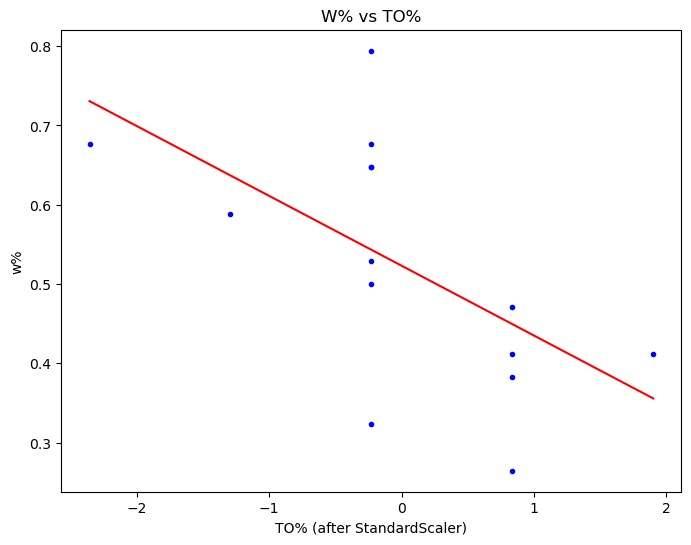

In [121]:
# Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
lin_reg_pred = lin_reg.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, lin_reg_pred)

# Métricas obtenidas con CV
lin_reg_cv = LinearRegression()
lin_reg_cv_scores = cross_val_score(lin_reg_cv, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
Display_CV_Scores(lin_reg_cv_scores)

# Visualizacion
VisualizeRegression(X_train, y_train, lin_reg_pred)

Conclusiones de este modelo:
 - Podemos ver que no hace overfitting, ya que usando el CV el resultado es ligeramente peor pero no algo abismal.
 - Vemos que el error no es gigante, pero si es suficientemente grande como para considerar que no es un modelo perfecto.

#### Polynomial Regression

No Cross Validation
RMSE Score:  0.11883737611389
----------
Cross Validation
RMSE Scores: [0.02509018 0.24444717 0.10789704 0.16351471 0.25955882 0.13676471
 0.07562582 0.05868861 0.26887255 0.10373775]
RMSE Mean: 0.14441973466419572
RMSE Standard deviation: 0.08275573765750138


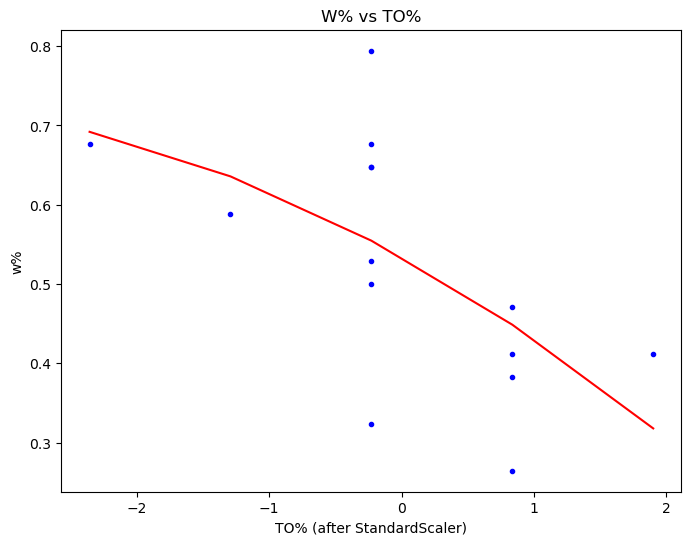

In [122]:
# Pasamos a polinómicas las features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

# Entrenamos el modelo
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Predicciones en el set de entrenamiento
X_new_poly = poly_features.transform(X_train)
pol_reg_pred = pol_reg.predict(X_new_poly)

# Métricas obtenidas sin CV
Display_Score(y_train, pol_reg_pred)

# Métricas obtenidas con CV
pol_reg_cv = LinearRegression()
pol_reg_cv_scores = cross_val_score(pol_reg_cv, X_poly, y_train, scoring="neg_mean_squared_error", cv=10)
Display_CV_Scores(pol_reg_cv_scores)

# Visualizacion
VisualizeRegression(X_train, y_train, pol_reg_pred)

Conclusiones de este modelo:
 - Mejora a Linear Regression por muy poco sin CV, pero el score con CV (el importante) es bastante peor.
 - Si aumentamos el grado polinómico (degree), se puede ver cómo el score sin CV mejora pero empeora cada vez más el score con CV ya que el sistema está haciendo overfitting. Por lo tanto el modelo se aprendería muy bien el set de entrenamiento pero no generalizaría, o lo que es lo mismo, el estudiante se sabe muy bien las preguntas del examen pero no la materia, osea que si le preguntamos algo distinto va a suspender. 

### 4.2. Fine-Tuning: hyperparameters

Una vez tenemos el mejor modelo, vamos a proceder a <strong>mejorarlo para ver cual es nuestro modelo final con sus mejores hyperparameters.</strong>

Vamos a ejecutar un proceso llamado Fine-Tune con el que queremos obtener los mejores hyperparameters para el modelo que hemos visto que mejor se adapta a nuestro set de datos (el set de entrenamiento!)

Al final lo que queremos es:
 - Una vez hemos probado varios modelos, seleccionamos el mejor
 - A ese modelo le probamos diferentes hyperparameters para mejorar el modelo y evitar el overfitting.

El mejor modelo ha sido <strong>Linear Regression</strong>, lo podemos ver en el RMSE (con CV) que nos ha dado el modelo. Por ello es tan importante conocer el objetivo de negocio, para poder definir bien el modelo y seleccionar la métrica adecuada.

In [123]:
def Display_Score(labels, predictions):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    print("No Cross Validation")
    print("RMSE Score: ", rmse)
    print("----------")
    
def Display_CV_Scores(scores):
    rmse_scores = np.sqrt(-scores)
    print("Cross Validation")
    print("RMSE Scores:", rmse_scores)
    print("RMSE Mean:", rmse_scores.mean())
    print("RMSE Standard deviation:", rmse_scores.std())
    
def VisualizeRegression(X, y, pred):
    
    X = X.loc[:, [X.columns[0]]]
    y = y.loc[:, [y.columns[0]]]

    inds = X.values.ravel().argsort()
    X = X.values.ravel()[inds].reshape(-1,1)
    y = y.values[inds]
    pred = pred[inds]
    
    fig, ax =  plt.subplots(figsize=(8, 6))
    ax.scatter(X, y,  color='blue', marker='.',)
    ax.plot(X, pred, color='red', label="Predictions")
    ax.set_title("W% vs TO%")
    ax.set_xlabel("TO% (after StandardScaler)")
    ax.set_ylabel("w%")
    plt.show()

No Cross Validation
RMSE Score:  0.11998871784035825
----------
Cross Validation
RMSE Scores: [0.01890523 0.06478135 0.0922793  0.16431636 0.2375     0.14411765
 0.07643189 0.06008403 0.27132353 0.11231618]
RMSE Mean: 0.12420555166676009
RMSE Standard deviation: 0.07658892123019022


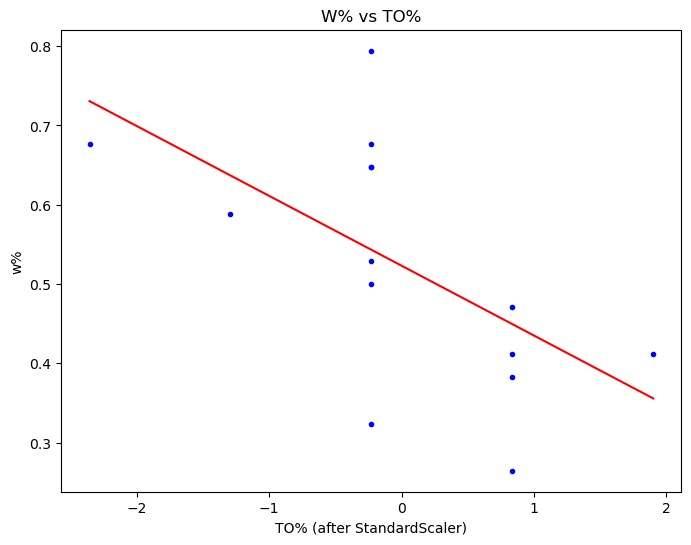

In [124]:
#####################
# Aplicar Linear Regression. Usar las funciones dadas para ello.
#####################
# Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
lin_reg_pred = lin_reg.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, lin_reg_pred)

# Métricas obtenidas con CV
lin_reg_cv = LinearRegression()
lin_reg_cv_scores = cross_val_score(lin_reg_cv, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
Display_CV_Scores(lin_reg_cv_scores)

# Visualizacion
VisualizeRegression(X_train, y_train, lin_reg_pred)

In [125]:
print(lin_reg.coef_)

[[-0.08800789]]


In [126]:
print(lin_reg.intercept_)

[0.52310924]


**W% = 0.52310924 - 0.08800789*TO% (after StandardScaler)**

## 5. Evaluation

Una vez tenemos elegido el mejor modelo con los mejores hyperparameters, queremos ejecutarlo con los datos del set de test que no ha sido utilizado en ningún caso.

<strong>Importante: el modelo espera una serie de entradas, por lo que este set debe pasar el mismo proceso de transformación que se hizo al set de train antes del entrenamiento.</strong>

Vamos a ello!

In [127]:
prep_test = PreparingData_v2(test_set)

prep_test.head()

,W%,TO%
0,0.147059,1.432078
1,0.500000,-1.171700
8,0.588235,-0.650945
5,0.441176,0.390567


In [128]:
X_test, y_test = splitDT(prep_test, 'W%')

RMSE:  0.14209594589308852


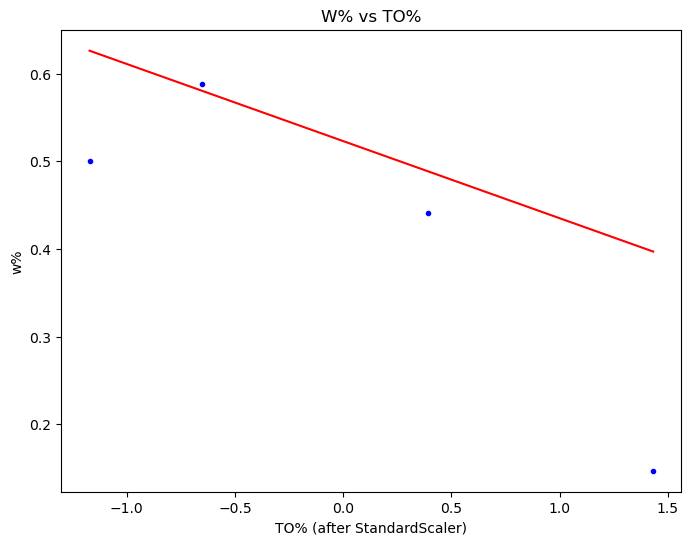

In [129]:
#####################
# Evaluar Linear Regression
# NOTA: usar el modelo que has entrenado aquí '{model}.fit(X_train, y_train)'
# Por ejemplo, en la práctica tenemos lin_reg y lin_reg_cv. Pues debemos usar lin_reg, es decir, el que usamos en
# lin_reg.fit()(X_train, y_train). El nombre del modelo que hayas puesto en tu fase de entrenamiento, debes ponerlo
# antes de 'predict'. Siguiendo el mismo ejemplo, lin_reg.predict
#####################

# Predicciones en el set de test
final_predictions = lin_reg.predict(X_test)

# Las métricas obtenidas en el test set (RMSE)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE: ", final_rmse)

# Visualizacion
VisualizeRegression(X_test, y_test, final_predictions)

Conclusiones del modelo final y el set de test:
 - Los resultados empeoran, hay una diferencia mayor entre las métricas del entrenamiento y el de testing. No es muy grande, pero si empeora susceptiblemente.
 - Como era de esperar, TO% no son el único buen indicador para predecir las victorias de un equipo. Vemos que hay una correlación interesante, pero se necesitan más variables para poder mejorar el modelo.